In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from tools.parametrize.explore import explore
from tools.basic.loadsavejson import loadjson
import glob
from model.post.post_processing import post_processing
import pandas as pd


In [2]:
paths = glob.glob("output/*/*.json")
paths = ["/".join(path.split("/")[:-1]) for path in paths]
# sort paths 
paths = sorted(list(set(paths)))

In [3]:
paths
df = pd.DataFrame(paths)
df

,0
0,output/2024-01-02__21-06-14__34919
1,output/2024-01-03__08-44-15__16274
2,output/2024-01-03__09-50-32__77741
3,output/2024-01-03__11-23-45__63400
4,output/2024-01-03__13-39-42__82231
5,output/2024-01-03__17-08-35__72097
6,output/2024-01-04__09-34-56__45061
7,output/2024-01-04__11-05-33__84897
8,output/2024-01-04__13-33-35__44460
9,output/2024-01-04__16-02-42__94907


In [4]:

id = "output/2024-01-02__21-06-14__34919"
id = "output/2024-01-03__08-44-15__16274"
id = "output/2024-01-03__09-50-32__77741"
id = "output/2024-01-03__11-23-45__63400"
id = "output/2024-01-03__13-39-42__82231"
results = post_processing(id)

In [7]:
results["frd"

SyntaxError: incomplete input (2894339353.py, line 1)

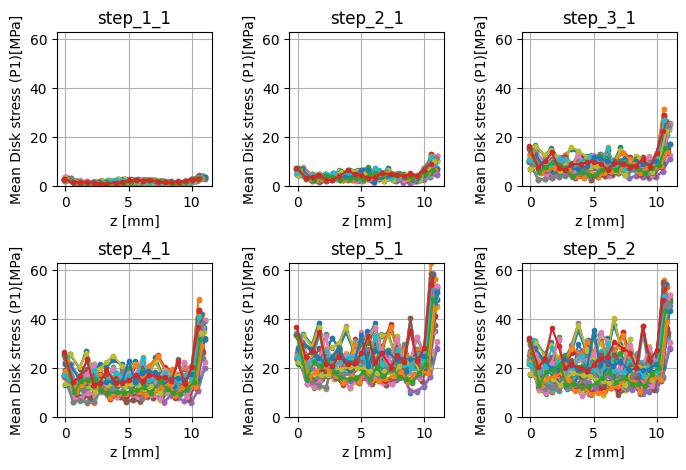

In [ ]:
n_results = len(results["measurements"])
fig = plt.figure(figsize=(8,8))
# padding 
plt.subplots_adjust(wspace=0.5,hspace=0.5)
nsq = int(np.ceil(np.sqrt(n_results)))
if nsq**2 < n_results:
    nsq += 1
max_sigma = np.max([np.max(r["mt"]) for r in results["measurements"]])
json_sim = results["simu_params"]

for j,r in enumerate(results["measurements"]):
    plt.subplot(nsq,nsq,j+1)
    yarns = r["yarns"]
    mt,mt_z = r["mt"],r["mt_z"]
    for iyarn in range(len(yarns)):
        z = mt_z[iyarn]
        plt.plot(z,mt[iyarn,:],'.-')
    plt.xlabel("z [mm]")
    plt.ylabel("Mean Disk stress (P1)[MPa]")
    plt.ylim([0,200])
    plt.title(results["frd"]["steps"][j])
    plt.ylim([0,max_sigma])

    
    plt.grid()

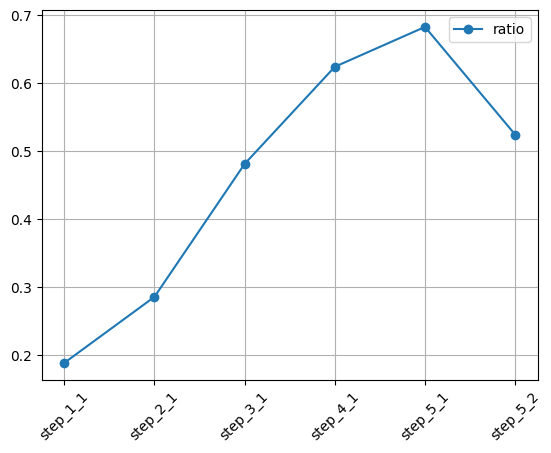

In [ ]:
plt.plot([ r["ratio"] for r in results["measurements"]],label="ratio",marker="o")
plt.legend()
plt.grid()
# text 
steps = results["frd"]["steps"]

# xticks
plt.xticks(range(len(steps)));
# xtickslabels
plt.gca().set_xticklabels(steps,rotation=45);


Text(0.5, 0, 'step')

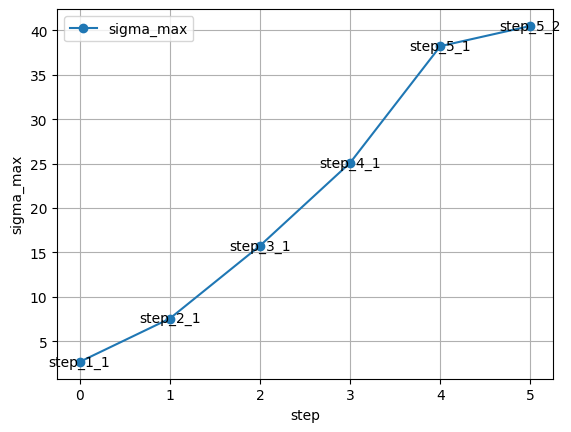

In [ ]:
var= "sigma_max"
values = [ r[var] for r in results["measurements"]]
plt.plot(values,label=var,marker="o")
plt.legend()
plt.grid()
# text 
steps = results["frd"]["steps"]
for i in range(len(steps)):
    plt.text(i,values[i],steps[i],rotation=0,ha="center",va="center")
plt.ylabel(var)
plt.xlabel("step")

In [ ]:
results_exp = loadjson("../T01_preprocessing/data/results.json")
results_exp_mono = loadjson("../../../C01_MultiYarn/validation/data/results.json")


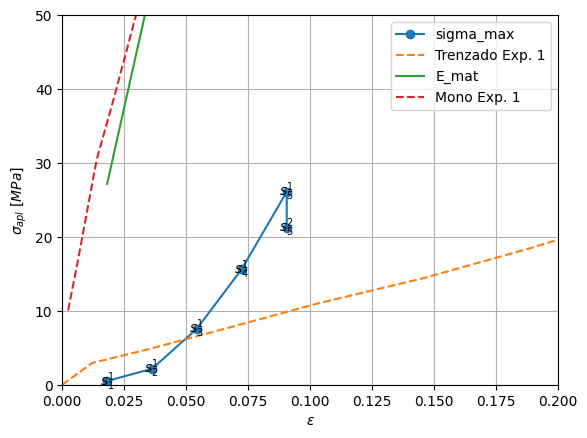

In [ ]:
df_mono = results_exp_mono["df_exp"]["exp 1"]
epsilons = [ r["epsilon"] for r in results["measurements"]]
sigma= [ r["sigma"] for r in results["measurements"]]
plt.plot(epsilons,sigma,label=var,marker="o")
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"$\sigma_{apl} \ [MPa]$")
for i in range(len(steps)):
    text_text = steps[i].split("_")
    text_text = "$s_{"+str(text_text[1])+"}"+"^{"+str(text_text[2])+"}$"
    plt.text(epsilons[i],sigma[i],text_text,rotation=0,ha="center",va="center")
xlim = plt.xlim()
ylim = plt.ylim()

plt.plot(results_exp["df_exp_1"]["strain [-]"],
         results_exp["df_exp_1"]["stress [MPa]"],
         label="Trenzado Exp. 1",ls="--")

epsilon_span = np.linspace(np.min(epsilons),
                           np.max(results_exp["df_exp_1"]["strain [-]"]),
                           100)
E_mat = results["simu_params"]["young"]
sigma_max_span = E_mat*epsilon_span
plt.plot(epsilon_span,sigma_max_span,label="E_mat",ls="-")

# plot df_mono
plt.plot(df_mono["strain [-]"],
         df_mono["stress [MPa]"],
         label="Mono Exp. 1",ls="--")

plt.grid()
plt.xlim(0,0.2)
plt.ylim(0,50)
plt.legend()

In [ ]:
results["measurements"][0].keys()

dict_keys(['yarns', 'sigma_max', 'A_total', 'F_total', 'sigma', 'Delta_L', 'mt', 'mt_z', 'ratio', 'length', 'epsilon', 'young_aprox'])

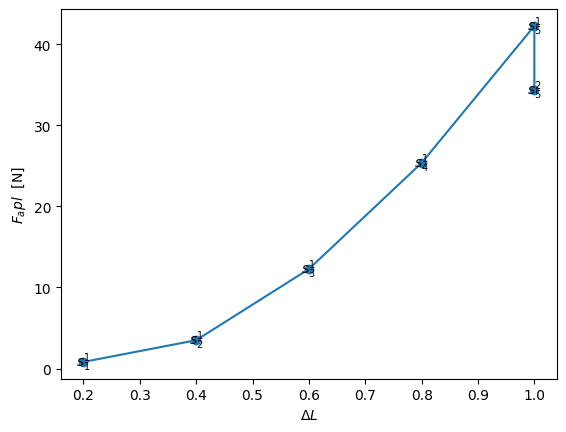

In [ ]:
epsilons = [ r["Delta_L"] for r in results["measurements"]]
sigma= [ r["F_total"] for r in results["measurements"]]
plt.plot(epsilons,sigma,label=var,marker="o")
plt.xlabel("$\\Delta L$")
plt.ylabel("$F_apl$  [N]")
for i in range(len(steps)):
    text_text = steps[i].split("_")
    text_text = "$s_{"+str(text_text[1])+"}"+"^{"+str(text_text[2])+"}$"
    plt.text(epsilons[i],sigma[i],text_text,rotation=0,ha="center",va="center")
xlim = plt.xlim()
ylim = plt.ylim()
